# Ecuaciones Diferenciales Parciales (PDEs)

## Ecuaciones diferenciales parciales hiperbólicas

Recordemos la condición para una ecuación diferencial hiperbólica con dos variables independientes
$$ 
\alpha\frac{\partial^2 \phi}{\partial x^2} + \beta\frac{\partial^2 \phi}{\partial x\partial y} + \gamma\frac{\partial^2 \phi}{\partial y^2} + \delta \frac{\partial\phi}{\partial x} + \varepsilon\frac{\partial\phi}{\partial y} = f.
$$
La condición para que esta PDE sea hiperbólica es que 
$$
\Delta \gt 0
$$
con $\Delta = \beta^2 - 4\alpha\gamma$.

Un caso particular de PDE hiperbólica es la ecuación de onda. En una dimension, la ecuación para la función de onda $\phi = \phi(x, t)$ toma la forma
$$
\boxed{\frac{\partial^2 \phi}{\partial t^2} = c^2 \frac{\partial^2 \phi}{\partial x^2}},
$$
donde $c$ es una constante positiva. La ecuación de onda describe el desplazamiento del equilibrio de algún campo $\phi$, que puede ser la posición de una cuerda o una onda electromagnética. 

En este caso, indentificamos
$$
x\to x,\quad y\to t,\quad \alpha \to c^2,\quad \gamma \to - 1,\quad \varepsilon, \beta, \gamma, \delta, f \to 0 \quad\Rightarrow\quad \beta^2 - 4\alpha\gamma = 4c^2 \gt 0,
$$
de manera tal que la ecuación es en efecto hiperbólica.

Al igual que nuestro estudio de ecuaciones parabólicas, la PDE de onda también es dinámica por lo que tenemos un problema de *condición de frontera y condición inicial*

### Inestabilidad del método FTCS explícito para ecuaciones hiperbólicas


La imagen anterior muestra la solución de la ecuación de onda para una cuerda en vibración de tamaño $L$ con sus extremos fijos. Para ciertos parámetros del cálculo, podemos observar que conforme transcurre el tiempo la solución se puede volver **inestable**. Esto usualmente se puede resolver utilizando valores menores del parámetro de discretización temporal $h$, sin embargo, esto puede dar lugar a cálculos muy costosos y soluciones que toman mucho tiempo para ser obtenidas.

Para el caso de ecuaciones de onda, el método FTCS explícito puede ser inestable a menos a que consideremos valores de discretización temporal muy pequeños. Además de esto, dependiendo de los parámetros del cálculo, puede que la solución siempre sea inestable aún con valores extremadamente pequeños de $h$.

El método FTCS explícito debería ser reservado para PDEs parabólicas, pero no para PDEs hiperbólicas.

## El método de Crank-Nicolson

La idea del método de Crank-Nicolson empieza con el concepto de que el método FTCS **explícito** también se puede escribir de manera **implícita**. 

#### FTCS explícito para la ecuación de onda

* Recordemos que las ODEs de orden mayor pueden ser resueltas como **conjuntos de ODEs de primer orden** 
* La discretización del método FTCS explícito para el caso de la ecuación hiperbólica de nuestro ejemplo, la ecuación de onda, se puede entender como como un conjunto de ODEs. En este caso,
$$
\frac{\partial \phi_m}{\partial t} = \psi_m, \quad \text{y}\quad \frac{\partial \psi_m}{\partial t} = \frac{c^2}{a^2}\left(\phi_{m+1} - 2\phi_m + \phi_{m-1}\right),
$$
donde $a$ es el espaciamiento espacial de la grilla.
* La discretización temporal, por ende, toma la forma (utilizando el método de Euler)
$$
    \begin{bmatrix}
        \phi_m^{n+1} \\
        \psi_m^{n+1}
    \end{bmatrix}
    = 
    \begin{bmatrix}
        1 & +h \\
        -\frac{2hc^2}{a^2} & 1
    \end{bmatrix}
    \begin{bmatrix}
        \phi_m^{n} \\
        \psi_m^{n}
    \end{bmatrix}
    +
    \begin{bmatrix}
        0 \\
        \frac{c^2 h}{a^2}\left(\phi_{m+1}^n + \phi_{m-1}^n\right)
    \end{bmatrix}
$$
Estas ecuaciones son las mismas ecuaciones que obtuvimos con el método FTCS explícito para ecuaciones parabólicas, con la excepción de que la segunda derivada temporal debe ser tratada como un conjunto de ODEs.

* El método FTCS explícito es preciso al primer orden de $h$, aunque es inestable para la ecuación de onda como observamos
* Con un análisis de Fourier, se puede entender que los errores en el método FTCS explícito crecen de forma exponencial conforme avanza el tiempo (ver Newman Cap 9).

#### FTCS implícito para la ecuación de onda

Con el método implícito, hacemos la sustitución $h \to -h$, de manera tal que en lugar de movernos hacia adelante en el tiempo lo hacemos hacia atrás. Es decir, del actual paso temporal nos movemos uno hacia atrás. Esto da lugar a
$$
\begin{align}
\phi_m^{n-1} & = \phi_m^{n} - h\psi_m^{n},\\
\psi_m^{n-1} & = \psi_m^{n} - h\frac{c^2}{a^2}\left(\phi_{m-1}^{n} + \phi_{m+1}^{n} - 2\phi_m^{n}\right),
\end{align}
$$
Posteriormente, hacemos la sustitución $t \to t + h$. Es decir, hacemos un cambio $n \to n +1$, con lo cual obtenemos
$$
\begin{align}
\phi_m^{n} & = \phi_m^{n+1} - h\psi_m^{n+1},\\
\psi_m^{n} & = \psi_m^{n+1} - h\frac{c^2}{a^2}\left(\phi_{m-1}^{n+1} + \phi_{m+1}^{n+1} - 2\phi_m^{n+1}\right),
\end{align}
$$
En representación matricial, de forma equivalente
$$
\begin{bmatrix}
    \phi_m^n \\
    \psi_m^n
\end{bmatrix}
= 
\begin{bmatrix}
    1 & -h \\
    +\frac{2hc^2}{a^2} & 1
\end{bmatrix}
\begin{bmatrix}
    \phi_m^{n+1} \\
    \psi_m^{n+1}
\end{bmatrix}
-
\begin{bmatrix}
    0 \\
    \frac{c^2 h}{a^2}\left(\phi_{m+1}^{n+1} + \phi_{m-1}^{n+1}\right)
\end{bmatrix}
$$

* Ahora tenemos una expresión **implícita**, es decir, el lado izquierdo de la ecuación contiene los campos $\phi$ y $\psi$ en el punto temporal $t$ mientras que el lado derecho contiene los campos en el punto $t + h$.
* Este método puede ser estable en ciertos casos, pero puede sufrir de problemas de precisión (tales como la soluciones que decaen a cero en tiempos largos)
* El método FTCS implícito también es preciso a primer orden de $h$.
* Con un análisis de Fourier, se puede entender que los errores en el método FTCS implícito **no** crecen de forma exponencial conforme avanza el tiempo, pero la solución puede decaer a cero en tiempos largos (ver Newman Cap 9).

#### El método de Crank-Nicolson

El método de Crank-Nicolson da a lugar cuando hacemos un promedio del método FTCS explícito e implícito. Tenemos:
* Explícito (*hacia adelante*)
$$ 
\begin{align}
\phi_m^{n+1} &= \phi_m^{n} + h\psi_m^{n}, & \psi_m^{n+1} = \psi_m^{n} + h\frac{c^2}{a^2}\left(\phi_{m-1}^{n} + \phi_{m+1}^{n} - 2\phi_m^{n}\right).
\end{align}
$$
* Implícito (*hacia atrás*)
$$ 
\begin{align}
\phi_m^{n+1} - h\psi_m^{n+1} &= \phi_m^n, &\psi_m^{n} = \psi_m^{n+1} - h\frac{c^2}{a^2}\left(\phi_{m-1}^{n+1} + \phi_{m+1}^{n+1} - 2\phi_m^{n+1}\right).
\end{align}
$$
* Crank-Nicolson
$$ 
\phi_m^{n+1} - \frac{h}2\psi_m^{n+1} = \phi_m^{n} + \frac{h}2\psi_m^{n}
$$
$$ 
\psi_m^{n+1} - \frac{h}2\frac{c^2}{a^2}\left(\phi_{m-1}^{n+1} + \phi_{m+1}^{n+1} - 2\phi_m^{n+1}\right) = \psi_m^{n} + \frac{h}2\frac{c^2}{a^2}\left(\phi_{m-1}^{n} + \phi_{m+1}^{n} - 2\phi_m^{n}\right).
$$

* El método de Crank-Nicolson es un híbrido entre los métodos FTCS explícito y FTCS implícito
* Con un análisis de Fourier, se puede entender que los errores en el método de Crank-Nicolson **no** crecen de forma exponencial conforme avanza el tiempo y la solución **no** decae a cero en tiempos largos (ver Newman Cap 9).
* La aproximación es precisa a **segundo orden** de $h$, al contrario de los métodos precedentes que son precisos a primer orden de $h$
* El problema que ahora tenemos es que el método es **indirecto**, es decir, no obtenemos la solución del campo $\phi$ en el tiempo $t + h$ como función de los campos $\phi$ y $\psi$ en el tiempo $t$, si no que debemos **resolver de forma simultánea las ecuaciones para obtener los valores requeridos**


## Ejemplo: Inestabilidad del método FTCS explícito para la ecuación de onda

Consideremos la ecuación de onda en una dimensión
$$
\frac{\partial^2\phi}{\partial t^2}=c^2\frac{\partial^2\phi}{\partial x^2}.
$$
Vamos a resolver la ecuación para una cuerda de piano de longitud $L$, initialmente en reposo. En el tiempo $t = 0$ la cuerda se golpea por el martillo del piano en el extremo de la cuerda, desplazándola una distancia $d$. La cuerda vibra como resultado excepto en sus extremos $x = 0$ y $x = L$.

Utilicemos los siguientes parámetros: $c = 100$ms$^{-1}$, con la condición inicial $\phi(x, t = 0) = 0$ pero con la velocidad inicial con un perfil Gaussiano
$$
\psi(x) = C\frac{x(L-x)}{L^2}\exp\left[-\frac{(x-d)^2}{2\sigma^2}\right],
$$
donde $L = 1$m, $d = 10$cm, $C=1\mathrm{ms^{-1}}$ y $\sigma=0.3$m. 

In [1]:
import numpy as np
# Siempre es una buena práctica utilizar metodología funcional
# Bajo este paradigma definimos funciones que realizan operaciones sobre los datos que se conectan entre si
# Para efectos de este ejemplo, utilicemos código lineal en el "main"
# Siempre es bueno evitar esto :)
c = 1.0
L = 1.0
d = 0.1
C = 1.0
sigma = 0.3
# Discretización espacial utilicemos 100 puntos en la grilla
N = 100
x = np.linspace(0.0, 1.0, N + 1)
a = L / N
# 4000 puntos temporales de t=0 hasta t = 2.0
tsteps = 4000
times = np.linspace(0.0, 2.0, tsteps + 1)
h = 2.0 / tsteps
# Phi
phi = np.zeros(101)
# Psi: código vectorial
psi = C * (x * (L - x) / (L * L)) * np.exp(-1.0 * (x - d)**2 / (2.0 * sigma * sigma))
# Para la animación
shape = [0.0 for i in range(len(times))]
# FTCS explícito
for tt in range(len(times)):
    # Voy a guardar los phi como función del tiempo
    shape[tt] = phi.copy()
    # Necesito una copia de psi porque requiero el arreglo al tiempo anterior
    psi_old = psi.copy()
    # Código vectorial
    # Este código hace lo mismo que hicimos en la clase anterior, pero vectorialmente :)
    psi[1:-1] += h * c**2 / a**2 * (phi[2:] + phi[:-2] - 2.0 * phi[1:-1])
    # Euler
    phi[1:-1] += h * psi_old[1:-1]

print(f"psi:= {psi} \n phi:= {phi}")

psi:= [  0.          -1.19166534   1.57490156  -1.00745218   0.48364157
  -0.56824818   1.65942876  -2.57785368   2.95601788  -2.03683557
   1.01950533   0.01530305   0.04814253  -0.10728692   0.41055207
   0.55817901  -1.98819333   4.57770996  -6.44697209   7.90035203
  -7.45480426   6.84608354  -5.85336614   6.4732168   -7.22545744
   8.43407037  -7.63933012   5.602096    -1.1944631   -3.2792178
   7.86654027 -10.02078382  10.57240085  -8.54172993   6.2657033
  -3.4596224    2.0478659   -0.80271209   0.58185806   0.49374125
  -1.70386168   4.24718161  -6.41962023   8.46682984  -8.45206742
   6.959282    -3.07368669  -1.47672318   6.44522415  -9.63994032
  11.00436506  -9.38260876   5.96078148  -0.95786112  -3.59443793
   7.19862944  -8.50069369   8.08564595  -5.92032074   3.47158379
  -1.13758526  -0.04882932   0.61112461  -0.70046618   1.44318235
  -2.9387689    5.49655994  -8.15245369  10.09930748  -9.98965359
   7.65850721  -3.40020324  -1.35145765   5.42681988  -7.67343202
   8.0

Una vez que tenemos el cálculo, hacemos una animación:

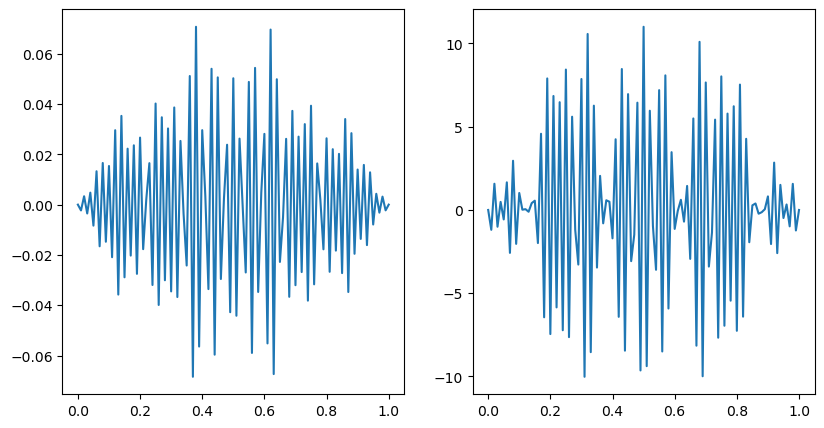

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(x, phi)
plt.subplot(1, 3, 2)
plt.plot(x, psi)
plt.show()

RuntimeError: Requested MovieWriter (ffmpeg) not available

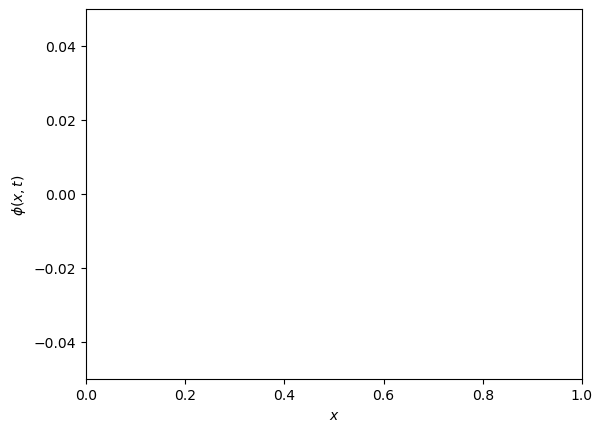

In [3]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

fig = plt.figure()
line, = plt.plot([])
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi(x,t)$')
plt.xlim(0.0, 1.0)
plt.ylim(-0.05, 0.05)

# Es más fácil invocar esta función con variables globales dado que espera una función de un argumento :(
# Puede tener argumentos opcionales para no utilizar variables globales pero no es tan sencillo el 
# llamado consecuente
skip = 10
def animate(frame):
    y = shape[frame * skip]
    line.set_data(x, y)
    
anim = FuncAnimation(fig, animate, frames = len(shape)//skip, interval = 10)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

#### Después de cierto tiempo la solución se vuelve inestable!!

Existen diversas formas de evitar esta inestabilidad. La formas más directa es reducir el valor de $h$
* Sin embargo esto incurre en un alto costo computacional
* Por esta razón, implementamos el método de Crank-Nicolson

Intente cambiar el valor de $h$ para que observe como incrementar $h$ resuelve la inestabilidad
* Esto implica cambiar el arreglo `times` para incluir más puntos y modificar el valor de $h$ de manera correcta
* **Sin embargo, sin importar que tan pequeño sea $h$, en cierto punto la solución se va a volver inestable en cierto punto en el tiempo!**. Esto se debe al incremento exponencial del error en la ecuación de onda utilizando FTCS explícito 

## Ejemplo: Método de Crank-Nicolson

La inestabilidad de la solución para la ecuación de onda nos lleva a implementar el método de Crank-Nicolson como discutimos anteriormente.

El problema es que implementar este método no es tan sencillo como el método FTCS explícito dado que ahora las ecuaciones son acopladas.

No es trivial de observar a primera vista, pero en la ecuación de Crank-Nicolson se pueden organizar los términos de la siguiente forma
$$
-k \phi^{n+1}_{m - 1} + (1 + 2k) \phi^{n+1}_{m} -k \phi^{n+1}_{m + 1} = k \phi^{n}_{m - 1} + (1 - 2k) \phi^{n}_{m} + k \phi^{n}_{m + 1} + h \psi^{n}_{m}
$$
$$
\psi^{n+1}_{m} = \psi^{n}_{m} + \frac{2k}{h}[\phi^{n+1}_{m - 1} + \phi^{n+1}_{m + 1} - 2\phi^{n+1}_{m} + \phi^{n}_{m - 1} + \phi^{n}_{m + 1} - 2\phi^{n}_{m}] 
$$
donde $k = h^2 c^2 / 4a^2$. La ventaja de expresarlo de esta forma es que ahora la primera ecuación **se convierte en una ecuación matricial de la forma**
$$
\mathbf{A}\vec{\phi}^{n+1} = \vec{b}^n
$$
donde $\vec{b} = k \phi^{n}_{m - 1} + (1 - 2k) \phi^{n}_{m} + k \phi^{n}_{m + 1} + h \psi^{n}_{m}$ y $\mathbf{A}$ es una **matriz tridiagonal** de dimensión $N$, con $N$ el número de subdivisiones de la discretización espacial. La matrix tiene la forma (e.g., $N=9$)
$$
\begin{pmatrix}
  A_1 & A_2 & & & & & & & \\
  A_2 & A_1 & A_2 & & & & & & \\
  & A_2 & A_1 & A_2 & & & & & \\
  & & A_2 & A_1 & A_2 & & & & \\
  & & & A_2 & A_1 & A_2 & & & \\
  & & & & A_2 & A_1 & A_2 & & \\ 
  & & & & & A_2 & A_1 & A_2 & \\
  & & & & & & A_2 & A_1 & A_2 \\
  & & & & & & & A_2 & A_1 \\
\end{pmatrix}
$$
con $A_1 = 1 + 2k$ y $A_2 = -k$.

* **Para resolver esta ecuación matricial necesitamos métodos matriciales (siguiente lección)**. Sin embargo, podemos utilizar `SciPy` para obtener una solución a la ecuación $\mathbf{A}\vec{\phi}^{n+1} = \vec{b}^n$ y obtener $\vec{\phi}^{n+1}$
* Veamos como se pone esto en práctica:

In [4]:
from scipy.linalg import solve_banded
# Definimos los parámetros
k = 0.25 * (h**2 * c**2 / a**2)
A1 = 1 + 2.0 * k
A2 = -1.0 * k
# Definimos los vectores que contiene la matriz A
# La rutina que vamos a utilizar para evaluar la solución matricial utiliza
# esta estructura de datos
A = np.zeros((3, N - 1)) # Esto se hace para excluir las condiciones de frontera
A[0] = A2
A[1] = A1
A[2] = A2
# Ahora aplicamos el método de Crank-Nicolson
# Reinicializamos arreglos
phi = np.zeros(N + 1)
psi = C * (x * (L - x) / (L * L)) * np.exp(-1.0 * (x - d)**2 / (2.0 * sigma * sigma))
shape = [0.0 for i in range(len(times))]
# Crank-Nicolson
for tt in range(len(times)):
    # Voy a guardar los phi como función del tiempo
    shape[tt] = phi.copy()
    # Necesito una copia de psi porque necesito psi en el tiempo anterior
    phi_old = phi.copy()
    # b
    b = k * phi[:-2] + (1 - 2*k) * phi[1:-1] + k * phi[2:] + h * psi[1:-1]
    # Solución a la ecuación matricial
    # El tuple (1,1) indica el número de diagonales arriba y abajo de la diagonal principal
    phi[1:-1] = solve_banded((1, 1), A, b)
    # Ahora sumo psi
    psi[1:-1] += (2 * k / h) * (phi[:-2] + phi[2:] - 2 * phi[1:-1] + phi_old[:-2] + phi_old[2:] - 2 * phi_old[1:-1])

Finalmente, volvemos a graficar la dinámica:

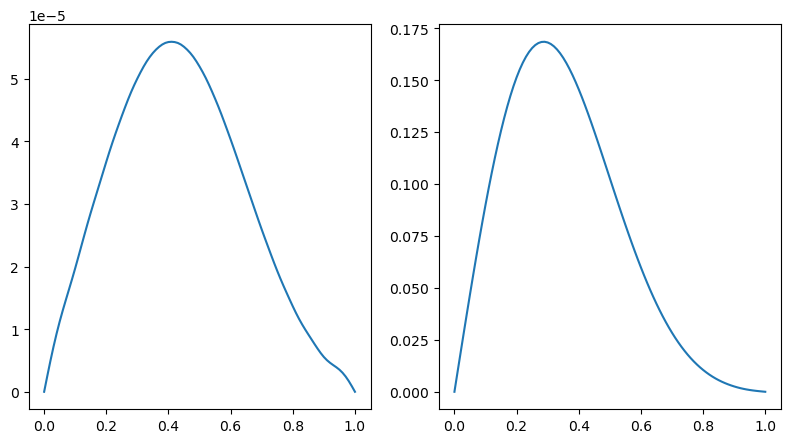

In [6]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(x, phi)
plt.subplot(1, 3, 2)
plt.plot(x, psi)
plt.show()

RuntimeError: Requested MovieWriter (ffmpeg) not available

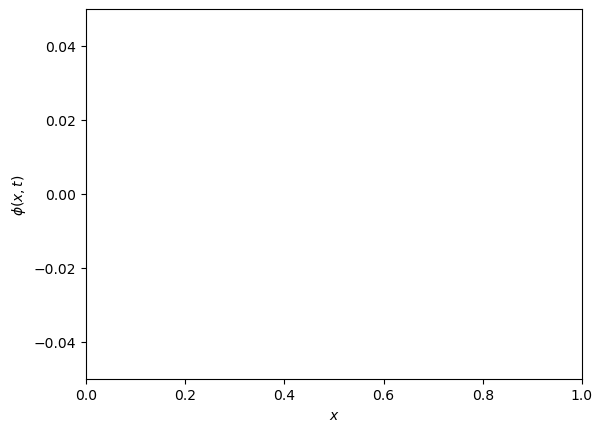

In [5]:
fig = plt.figure()
line, = plt.plot([])
plt.xlabel(r'$x$')
plt.ylabel(r'$\phi(x,t)$')
plt.xlim(0.0, 1.0)
plt.ylim(-0.05, 0.05)

skip = 10
def animate(frame):
    y = shape[frame * skip]
    line.set_data(x, y)
    
anim = FuncAnimation(fig, animate, frames = len(shape)//skip, interval = 10)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()